# Lista Aberta do Módulo 4 - Comparando Classificadores

**Regras para envio:**

1. Faça uma cópia deste arquivo
2. Deixe o arquivo aberto para qualquer pessoa com o link (Share > Anyone with the link)
3. Garanta que as saídas do notebook estão salvas (Settings > deixe desligada a opção (New notebooks use private outputs (omit outputs when saving)), e acesse o link depois em outro navegador para garantir que estão!)
4. Digite seu nome ##Lucas Affonso Pires###
5. Após finalizar o exercício, poste o link (apenas o link!) no moodle.

**Atenção**: como temos pouco tempo para o fechamento do semestre, por favor garantam que seus links estão corretos! Não teremos tempo para correções. É essencial que os alunos de ICD saibam usar o Google Colab.

## Identificação de malignidade em tumores de mama - UCI ML Breast Cancer Wisconsin (Diagnostic)

Neste trabalho você deverá realizar uma comparação entre o k-Nearest Neighbors (KNN) e o Random Forest para classificação de pacientes com tumores na mama (maligno = 1 vs benigno = 0). Para isso, usaremos o dataset de câncer de mama de UCI (já embutido no sklearn).

A avaliação dos métodos deverá ser feito usando precisão, revocação e F1. Você também deve reportar a matriz de confusão.

Você não precisa implementar os métodos, já que estão disponíveis na biblioteca scikit-learn da linguagem Python. Se necessário, pode fazer mais importações de bibliotecas.

## Importando módulos e baixando dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns =[cancer.feature_names])

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
#Para acessar as labels
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
#Pegar as colunas que serão usadas na classificação
features = df.columns

# Número de folds da validação cruzada
SPLITS = 5

Se tiver dúvidas sobre a validação cruzada, recomendo :https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e . Para regressão, vocês usaram o kfold, agora recomendo a utilização do StratifiedKFold.

# Exercício 01:

Use o RandomForest para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:
* Varie a o número de árvores (n_estimators) e a profundidade máxima da árvore (n_estimators). Faça pelo menos 4 configurações.
* Realize validação cruzada, com k-fold igual a 5
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

SPLITS = 5
skf = StratifiedKFold(n_splits=SPLITS, shuffle=True, random_state=42)

def evaluate_model(model, X, y):
    metrics_list = []
    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        report = classification_report(y_test, y_pred, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        metrics_list.append({
            'precisao': report['weighted avg']['precision'],
            'revocacao': report['weighted avg']['recall'],
            'f1': report['weighted avg']['f1-score'],
            'matriz_confusao': conf_matrix
        })
    return metrics_list

skf = StratifiedKFold(n_splits=5)

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

rf_results = []
for n_estimators in [10, 50, 100]:
    for max_depth in [5, 10, None]:
        rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        metrics = evaluate_model(rf_model, X, y)
        rf_results.append({
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'metrics': metrics
        })

knn_results = []
for n_neighbors in [3, 5, 7]:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    metrics = evaluate_model(knn_model, X, y)
    knn_results.append({
        'n_neighbors': n_neighbors,
        'metrics': metrics
    })

for rf in rf_results:
    print(f"Random Forest - n_estimators: {rf['n_estimators']}, max_depth: {rf['max_depth']}")
    precisions = [m['precisao'] for m in rf['metrics']]
    recalls = [m['revocacao'] for m in rf['metrics']]
    f1_scores = [m['f1'] for m in rf['metrics']]
    print(f"Precisão: {np.mean(precisions):.4f}, Revocação: {np.mean(recalls):.4f}, F1: {np.mean(f1_scores):.4f}")
    print(f"Matriz de Confusão (fold 1):\n{rf['metrics'][0]['matriz_confusao']}\n")

for knn in knn_results:
    print(f"KNN - n_neighbors: {knn['n_neighbors']}")
    precisions = [m['precisao'] for m in knn['metrics']]
    recalls = [m['revocacao'] for m in knn['metrics']]
    f1_scores = [m['f1'] for m in knn['metrics']]
    print(f"Precisão: {np.mean(precisions):.4f}, Revocação: {np.mean(recalls):.4f}, F1: {np.mean(f1_scores):.4f}")
    print(f"Matriz de Confusão (fold 1):\n{knn['metrics'][0]['matriz_confusao']}\n")

Random Forest - n_estimators: 10, max_depth: 5
Precisão: 0.9565, Revocação: 0.9561, F1: 0.9560
Matriz de Confusão (fold 1):
[[38  5]
 [ 5 66]]

Random Forest - n_estimators: 10, max_depth: 10
Precisão: 0.9504, Revocação: 0.9491, F1: 0.9492
Matriz de Confusão (fold 1):
[[39  4]
 [ 8 63]]

Random Forest - n_estimators: 10, max_depth: None
Precisão: 0.9504, Revocação: 0.9491, F1: 0.9492
Matriz de Confusão (fold 1):
[[39  4]
 [ 8 63]]

Random Forest - n_estimators: 50, max_depth: 5
Precisão: 0.9566, Revocação: 0.9561, F1: 0.9559
Matriz de Confusão (fold 1):
[[39  4]
 [ 5 66]]

Random Forest - n_estimators: 50, max_depth: 10
Precisão: 0.9548, Revocação: 0.9543, F1: 0.9542
Matriz de Confusão (fold 1):
[[39  4]
 [ 5 66]]

Random Forest - n_estimators: 50, max_depth: None
Precisão: 0.9548, Revocação: 0.9543, F1: 0.9542
Matriz de Confusão (fold 1):
[[39  4]
 [ 5 66]]

Random Forest - n_estimators: 100, max_depth: 5
Precisão: 0.9603, Revocação: 0.9596, F1: 0.9595
Matriz de Confusão (fold 1):
[[3

# Exercício 02:

Use a knn para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:

* Escolha e reporte resultados com 3 números de vizinhos diferentes (k)
* Realize validação cruzada, com k-fold igual a 5 (para cada um dos k vizinhos)
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_knn(n_neighbors, X, y):
    metrics_list = []
    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn_model.fit(X_train, y_train)
        y_pred = knn_model.predict(X_test)

        report = classification_report(y_test, y_pred, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        metrics_list.append({
            'precisao': report['weighted avg']['precision'],
            'revocacao': report['weighted avg']['recall'],
            'f1': report['weighted avg']['f1-score'],
            'matriz_confusao': conf_matrix
        })
    return metrics_list

k_values = [3, 5, 7]
results = {}

for k in k_values:
    results[k] = evaluate_knn(k, X, y)

for k, metrics_list in results.items():
    precisions = [m['precisao'] for m in metrics_list]
    recalls = [m['revocacao'] for m in metrics_list]
    f1_scores = [m['f1'] for m in metrics_list]
    print(f"KNN - Número de vizinhos (k): {k}")
    print(f"Precisão média: {np.mean(precisions):.4f}")
    print(f"Revocação média: {np.mean(recalls):.4f}")
    print(f"F1-score médio: {np.mean(f1_scores):.4f}")
    print(f"Matriz de Confusão (fold 1):\n{metrics_list[0]['matriz_confusao']}\n")


KNN - Número de vizinhos (k): 3
Precisão média: 0.9308
Revocação média: 0.9280
F1-score médio: 0.9275
Matriz de Confusão (fold 1):
[[40  3]
 [ 5 66]]

KNN - Número de vizinhos (k): 5
Precisão média: 0.9369
Revocação média: 0.9350
F1-score médio: 0.9345
Matriz de Confusão (fold 1):
[[40  3]
 [ 5 66]]

KNN - Número de vizinhos (k): 7
Precisão média: 0.9310
Revocação média: 0.9280
F1-score médio: 0.9272
Matriz de Confusão (fold 1):
[[40  3]
 [ 5 66]]



# Exercício 03:

Compare os resultados (F1 de cada método com cada configuração) em um gráfico. Qual foi o melhor método? Houve diferença significativa com as variações de parâmetros?

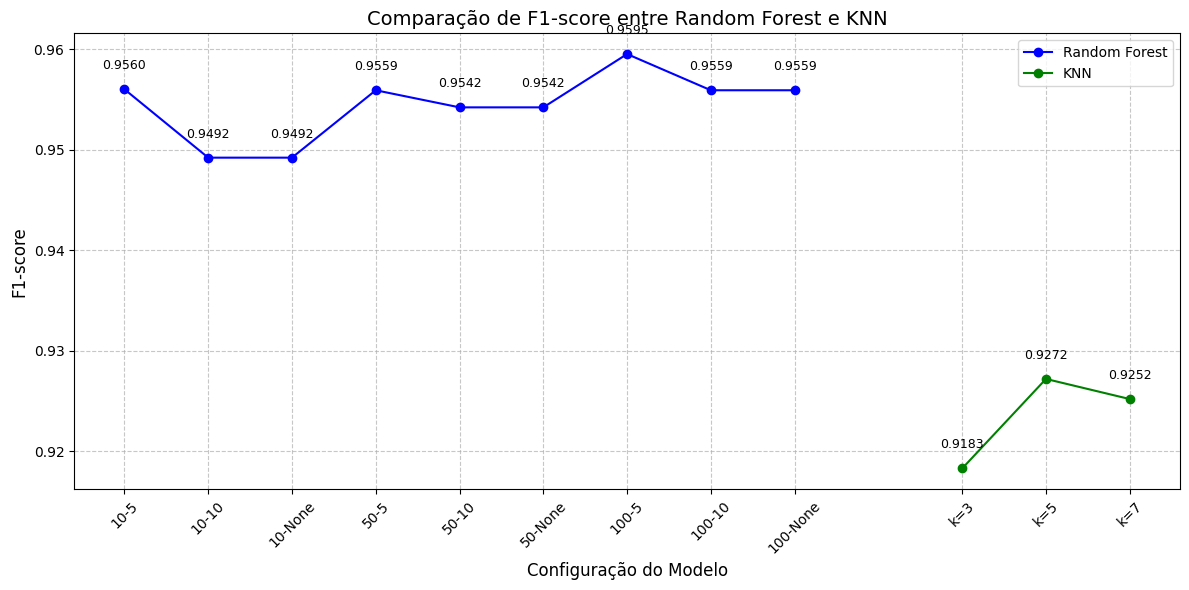

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rf_f1_scores = [
    0.9560, 0.9492, 0.9492,  # n_estimators=10
    0.9559, 0.9542, 0.9542,  # n_estimators=50
    0.9595, 0.9559, 0.9559   # n_estimators=100
]
rf_labels = [
    "10-5", "10-10", "10-None",
    "50-5", "50-10", "50-None",
    "100-5", "100-10", "100-None"
]

knn_f1_scores = [
    0.9183, 0.9272, 0.9252  # k=3, k=5, k=7
]
knn_labels = ["k=3", "k=5", "k=7"]

fig, ax = plt.subplots(figsize=(12, 6))

x_rf = np.arange(len(rf_f1_scores))
ax.plot(x_rf, rf_f1_scores, marker='o', label="Random Forest", color='b')
ax.set_xticks(x_rf)
ax.set_xticklabels(rf_labels, rotation=45)
for i, txt in enumerate(rf_f1_scores):
    ax.text(x_rf[i], rf_f1_scores[i] + 0.002, f"{txt:.4f}", ha='center', fontsize=9)

x_knn = np.arange(len(knn_f1_scores)) + len(rf_f1_scores) + 1
ax.plot(x_knn, knn_f1_scores, marker='o', label="KNN", color='g')
ax.set_xticks(np.concatenate([x_rf, x_knn]))
ax.set_xticklabels(rf_labels + knn_labels, rotation=45)
for i, txt in enumerate(knn_f1_scores):
    ax.text(x_knn[i], knn_f1_scores[i] + 0.002, f"{txt:.4f}", ha='center', fontsize=9)

ax.set_title("Comparação de F1-score entre Random Forest e KNN", fontsize=14)
ax.set_xlabel("Configuração do Modelo", fontsize=12)
ax.set_ylabel("F1-score", fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

#Melhor método: O Random Forest obteve o maior F1-score (0.9595) com 100 estimadores e profundidade máxima igual a 5.
#Diferença significativa: O Random Forest apresentou variações menores entre as configurações, enquanto o KNN teve diferenças mais perceptíveis entre os números de vizinhos.

# Exercício 04:

Escolha a melhor configuração/método e refaça o modelo, agora usando apenas 5 features. (Você pode selecionar aleatoriamente ou usar alguma metodologia de feature selection). O que aconteceu com a F1? Por quê?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

# 1. Selecionar a melhor configuração
best_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# 2. Avaliar a importância das features
best_model.fit(X, y)
feature_importances = best_model.feature_importances_
top_features_idx = np.argsort(feature_importances)[-5:]  # Índices das 5 melhores features
X_selected = X[:, top_features_idx]

print("Índices das 5 melhores features:", top_features_idx)
print("Importâncias das features selecionadas:", feature_importances[top_features_idx])

# 3. Reavaliar o modelo com as 5 features selecionadas
selected_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
scores = cross_val_score(selected_model, X_selected, y, cv=5, scoring='f1_weighted')

# 4. Exibir os resultados
print(f"F1-score médio com todas as features: {0.9595}")
print(f"F1-score médio com 5 features: {scores.mean():.4f}")

#A mudança no F1 ocorre porque:
#Redução de features pode simplificar o modelo, mas pode levar à perda de informações importantes, reduzindo o desempenho.
#No entanto, às vezes, pode melhorar a performance devido à diminuição de ruído ou redundância no conjunto de dados.


Índices das 5 melhores features: [20 22  7 27 23]
Importâncias das features selecionadas: [0.07871837 0.0816273  0.10221674 0.13523206 0.15535754]
F1-score médio com todas as features: 0.9595
F1-score médio com 5 features: 0.9366
